# Project No. 02 - Titanic Classification

# Name - Kumar Shivam
## Data Science Internship
## Bharat Intern - Jan/2024

In [3]:
pip install mplcyberpunk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Importing required libraries

In [91]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV , train_test_split
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
import mplcyberpunk
plt.style.use('cyberpunk')

### Importing dataset

In [113]:
data = pd.read_csv('Titanic.csv')

In [114]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data summary

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [116]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


<Axes: >

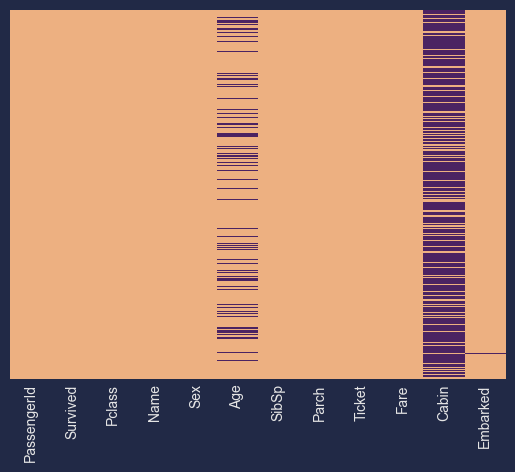

In [117]:
sns.heatmap(data.isna(),yticklabels=False ,cbar=False,cmap='flare')

### Data Visualization

<Axes: xlabel='Survived', ylabel='count'>

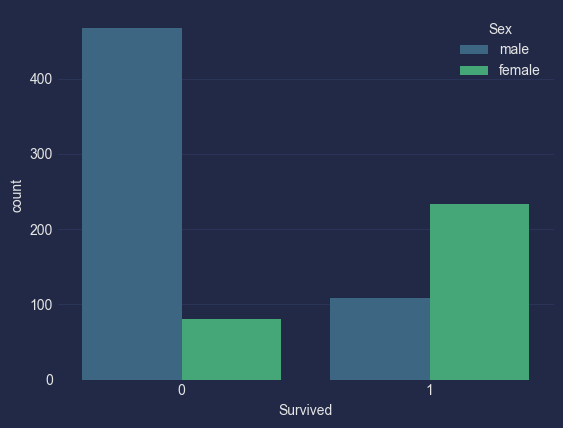

In [118]:
sns.countplot(x = 'Survived' , data=data ,hue='Sex',palette='viridis')

<Axes: xlabel='Survived', ylabel='count'>

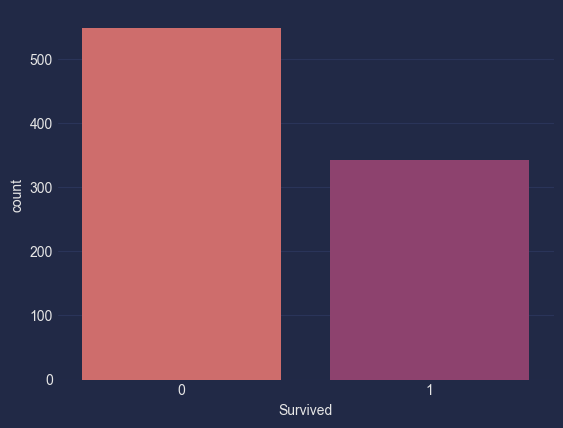

In [119]:
sns.countplot(x = 'Survived', data=data, palette='flare' )

<Axes: xlabel='Survived', ylabel='count'>

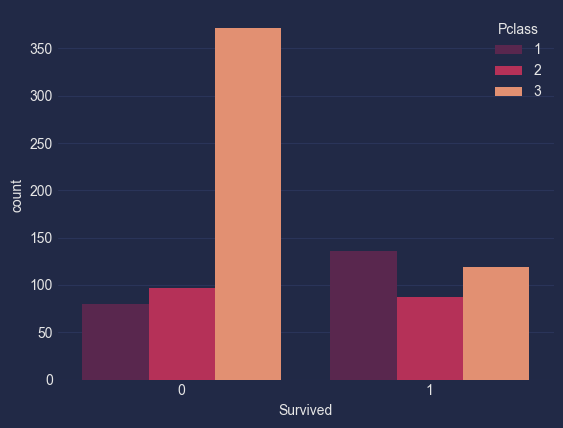

In [120]:
sns.countplot(x = 'Survived' , data=data ,hue='Pclass',palette='rocket')

<Axes: >

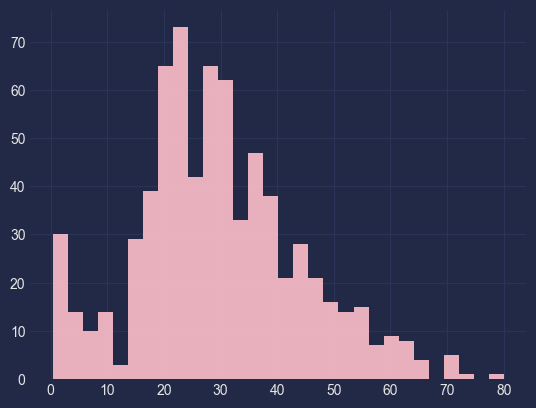

In [123]:
data['Age'].hist(bins=30, color='pink',alpha=0.9)

<Axes: >

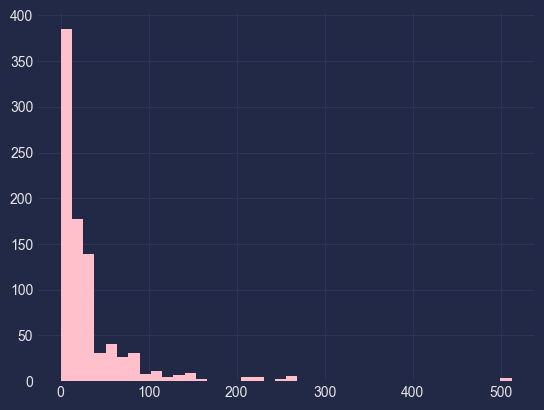

In [124]:
data['Fare'].hist(bins=40, color='pink')

<Axes: ylabel='Fare'>

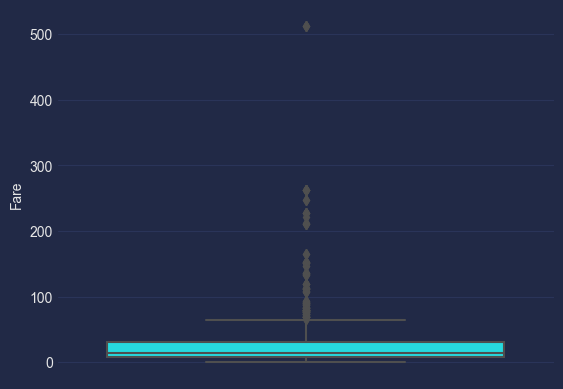

In [125]:
sns.boxplot(y='Fare',data=data)

Text(0, 0.5, 'Frequency')

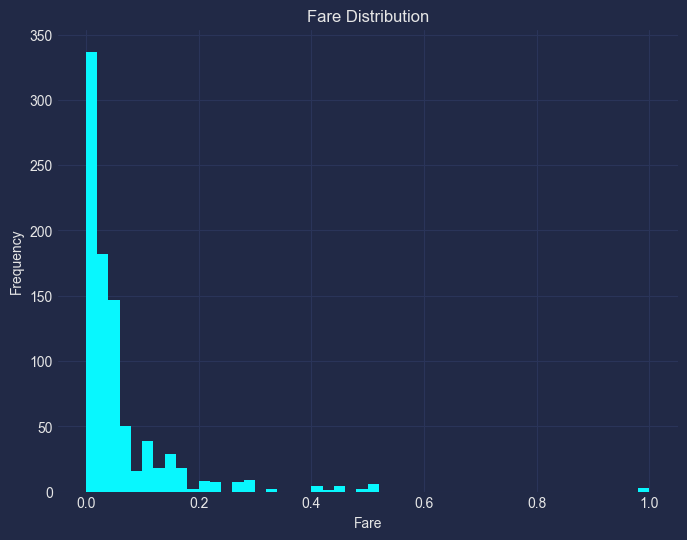

In [141]:
plt.figure(figsize=(8,6))
plt.hist(data['Fare'], bins = 50)
plt.title("Fare Distribution")
plt.xlabel('Fare')
plt.ylabel('Frequency')

In [126]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [127]:
data.drop('Cabin' , inplace = True ,axis=1)

In [128]:
data['Embarked'] = data['Embarked'].fillna('S')

In [129]:
data.isna().sum().sort_values(ascending=False)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [130]:
data.dropna(inplace=True)

In [131]:
data.shape

(891, 11)

In [132]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [133]:
Sex = pd.get_dummies(data['Sex'],drop_first=True)

In [134]:
Embarked = pd.get_dummies(data['Embarked'],drop_first=True)

In [135]:
data.drop(['Sex' , 'Embarked','Name','Ticket'],axis=1,inplace=True)

In [136]:
data = pd.concat([data,Sex,Embarked],axis=1)

In [143]:
le = LabelEncoder()
data['male'] = le.fit_transform(data['male'])
data['Q'] = le.fit_transform(data['Q'])
data['S'] = le.fit_transform(data['S'])

In [144]:
sc = MinMaxScaler()
data['Fare'] = sc.fit_transform(data['Fare'].values.reshape(-1, 1))

In [145]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,0.014151,1,0,1
1,2,1,1,38.0,1,0,0.139136,0,0,0
2,3,1,3,26.0,0,0,0.015469,0,0,1
3,4,1,1,35.0,1,0,0.103644,0,0,1
4,5,0,3,35.0,0,0,0.015713,1,0,1


In [179]:
x = data.drop((['Survived', 'PassengerId']) , axis = 1)
y = data['Survived']

### Splitting dataset into Training and Testing sets

In [147]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 ,random_state=42)

In [148]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((712, 8), (179, 8), (712,), (179,))

In [157]:
lr = LogisticRegression(random_state=42)
param_grid_lr = {
    'C' : [100,10,1.0,0.1,0.01],
    'penalty':['l1','l2']
}

lr_grid_model = GridSearchCV(lr,param_grid=param_grid_lr , scoring='accuracy' , cv= 5)
lr_grid_model.fit(x_train,y_train)
print("Best Parameters: ", lr_grid_model.best_params_)
Best_Logistic_Regression_Model = lr_grid_model.best_estimator_

C:\Users\Bushra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Bushra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Best Parameters:  {'C': 10, 'penalty': 'l2'}


C:\Users\Bushra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Bushra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
-------------------------------------------------------------

In [162]:
print("Accuracy on Training Set: {:.2f}".format(lr_grid_model.best_score_ * 100))

Accuracy on Training Set: 79.07


In [163]:
LR_Grid_Score = Best_Logistic_Regression_Model.score(x_test, y_test)
print("Accuracy By Best Logistic Regression Model:",LR_Grid_Score*100)

Accuracy By Best Logistic Regression Model: 81.00558659217877


Text(0.5, 1.0, 'Confusion Matrix For Best Logistic Regression')

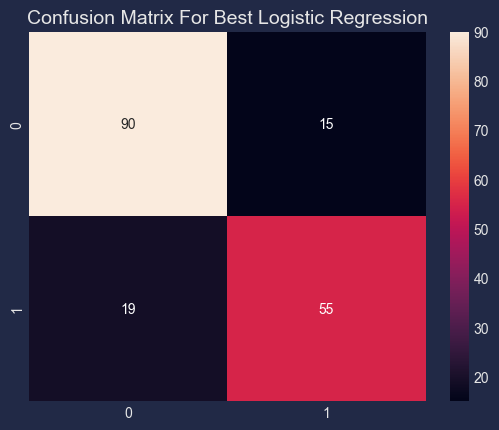

In [164]:
lr_grid_y_pred = Best_Logistic_Regression_Model.predict(x_test)
conf_matrix = confusion_matrix(y_test, lr_grid_y_pred)
sns.heatmap(conf_matrix, annot=True)
plt.title("Confusion Matrix For Best Logistic Regression", fontsize=14)

In [165]:
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [10, 100,1000],
    'max_depth': [15,20,40,80,90],
    'max_features' :[0.5,1,2,3],
    'min_samples_split': [8, 10,12],
    'min_samples_leaf': [ 5,10,15],
    'criterion' : ['gini', 'entropy'],
    'bootstrap': [True]
   
}

rf_grid_model = GridSearchCV(rf,param_grid=param_grid_rf , cv= 3,n_jobs=-1,verbose=1)
rf_grid_model.fit(x_train,y_train)
print("Best Parameters: ", rf_grid_model.best_params_)
Best_RandomForest_Model = rf_grid_model.best_estimator_

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits
Best Parameters:  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 2, 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 10}


In [167]:
print("Accuracy on Training Set: {:.2f}".format(rf_grid_model.best_score_ * 100))

Accuracy on Training Set: 83.15


In [168]:
RF_Grid_Score = Best_RandomForest_Model.score(x_test, y_test)
print("Accuracy By Best RandomForest Model:",RF_Grid_Score*100)

Accuracy By Best RandomForest Model: 81.56424581005587


Text(0.5, 1.0, 'Confusion Matrix For Best RandomForest')

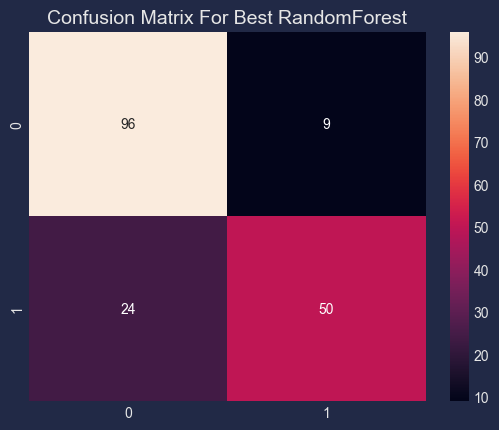

In [169]:
rf_grid_y_pred = Best_RandomForest_Model.predict(x_test)
conf_matrix = confusion_matrix(y_test, rf_grid_y_pred)
sns.heatmap(conf_matrix, annot=True)
plt.title("Confusion Matrix For Best RandomForest", fontsize=14)

In [170]:
decision_tree_model = DecisionTreeClassifier(max_depth=10 ,criterion='gini',min_samples_split=4,min_samples_leaf=4,max_features=None,random_state=42)
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=4,
                       random_state=42)

In [171]:
y_train_pred_dt = decision_tree_model.predict(x_train)
accuracy_train_dt = accuracy_score(y_train, y_train_pred_dt)
print("Accuracy on Training Set: {:.2f}".format(accuracy_train_dt* 100))

Accuracy on Training Set: 88.48


In [176]:
DT_Score = decision_tree_model.score(x_test, y_test)
print("Accuracy By Decision Tree Model:",DT_Score*100)

Accuracy By Decision Tree Model: 84.91620111731844


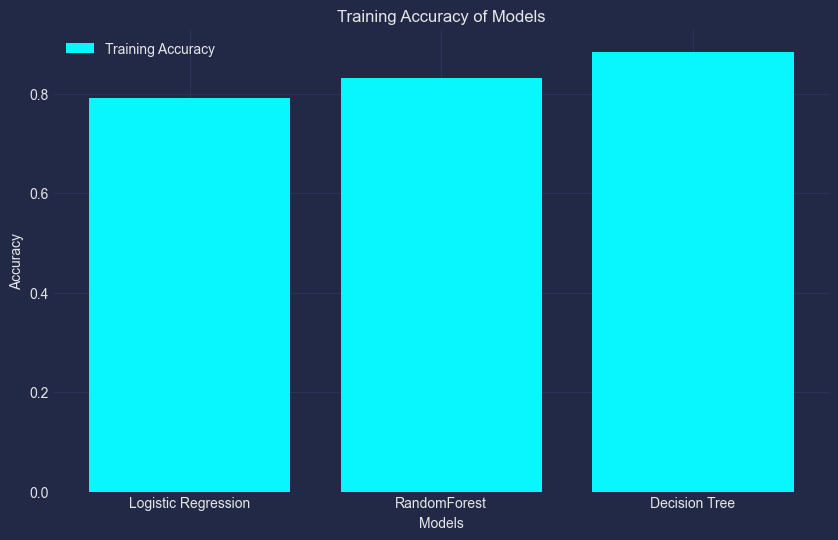

In [177]:
model_names = ['Logistic Regression', 'RandomForest','Decision Tree']
train_accuracies = [lr_grid_model.best_score_,rf_grid_model.best_score_,accuracy_train_dt]     
plt.figure(figsize=(10, 6))
plt.bar(model_names, train_accuracies, label='Training Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Training Accuracy of Models')
plt.legend()
plt.show()

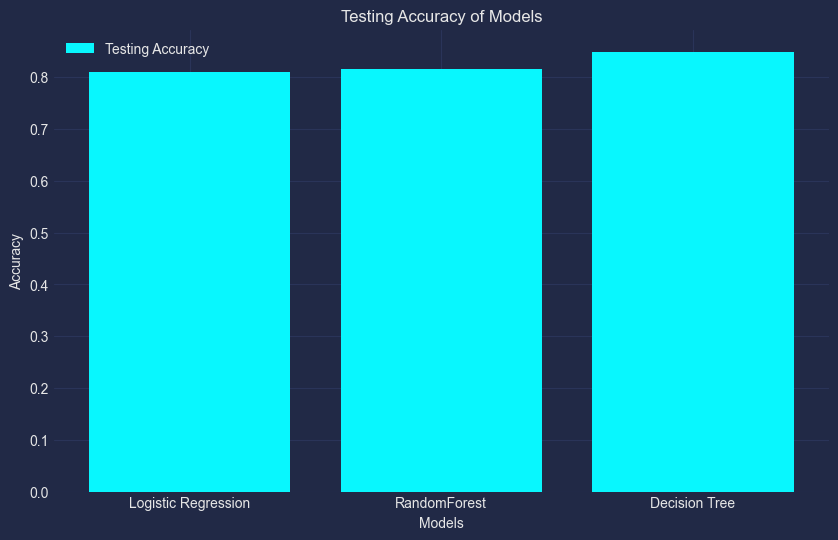

In [178]:
plt.figure(figsize=(10, 6))
test_accuracies = [LR_Grid_Score, RF_Grid_Score,DT_Score]  
plt.bar(model_names, test_accuracies, label='Testing Accuracy')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Testing Accuracy of Models')
plt.legend()

plt.show()